# ✅ Netflix Business Case — Phase 1: Business Understanding & Data Preparation

**📌 Step 1: Business Problem & Analysis Goal**

# Netflix Business Case: Data Exploration & Visualisation

## Business Problem:
Netflix wants to understand what type of content (Movies/TV Shows), genres, and creators drive engagement across different countries. This will help them decide **what to produce next and where to expand**.

## Goals of This Analysis:
1. Explore the available content on Netflix (Movies & TV Shows).
2. Analyze patterns in release dates, addition dates, genres, directors, and actors.
3. Identify trends over time (e.g., more focus on Movies or TV Shows in recent years).
4. Understand what type of content works best in different countries.
5. Deliver clear, actionable insights for Netflix’s business teams.

## Dataset Overview:
The dataset contains listings of Netflix Movies & TV Shows, including:
- Show ID, Title, Director, Cast
- Country, Release Year, Date Added
- Type (Movie/TV Show), Rating, Duration, Genre, and Description.

---


**🔧 Step 2: Import Libraries & Load the Dataset**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure visualization
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/streaming_service.csv')

In [3]:
# Preview the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
# Dataset shape (rows, columns)
df.shape

(8807, 12)

In [5]:
# List of all columns and their data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
# Missing value counts in each column
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [7]:
# Quick statistical summary (mostly useful for numeric fields)
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8807.000000,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,NaN,17,220,514,8775
top,s8807,Movie,Zubaan,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,NaN,3207,1793,362,4
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014.180198,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.819312,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019.000000,NaN,NaN,NaN,NaN


✅ **Phase 1 Summary: Business Understanding & Data Preparation**

### 🔍 **Key Observations from the Raw Data**

| Column        | Type   | Missing Values | Notes                                                        |
| ------------- | ------ | -------------- | ------------------------------------------------------------ |
| show\_id      | object | 0              | Unique identifier, no cleaning needed                        |
| type          | object | 0              | Movie / TV Show                                              |
| title         | object | 0              | Movie/TV Show titles                                         |
| director      | object | 2634           | Many missing → we'll fill with `"Unknown Director"`          |
| cast          | object | 825            | Many missing → we'll fill with `"Unknown Cast"`              |
| country       | object | 831            | Important for analysis → we'll fill with `"Unknown Country"` |
| date\_added   | object | 10             | Minor missing → we'll handle as `"Unknown Date"`             |
| release\_year | int64  | 0              | Numeric, spans 1925 to 2021                                  |
| rating        | object | 4              | Small missing → fill with `"Unknown Rating"`                 |
| duration      | object | 3              | Mix of minutes/seasons → we'll split later                   |
| listed\_in    | object | 0              | Genre(s), multi-valued → needs unnesting later               |
| description   | object | 0              | Not used in this analysis                                    |

---

**⚙️ Step 4: Handle Missing Values**

In [8]:
# Phase 1 - Step 4: Handle Missing Values

# Fill missing categorical values with 'Unknown <column>'
df['director'].fillna('Unknown Director', inplace=True)
df['cast'].fillna('Unknown Cast', inplace=True)
df['country'].fillna('Unknown Country', inplace=True)
df['date_added'].fillna('Unknown Date', inplace=True)
df['rating'].fillna('Unknown Rating', inplace=True)
df['duration'].fillna('Unknown Duration', inplace=True)

# Verify no missing values remain
df.isnull().sum()

/tmp/ipython-input-901270595.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown Director', inplace=True)
/tmp/ipython-input-901270595.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


**🔍 Step 5: Convert 'type', 'rating', 'country' columns to category type (for optimization):**

In [9]:
# Phase 1 - Step 5: Convert to category where applicable

for col in ['type', 'rating', 'country']:
    df[col] = df[col].astype('category')

# Recheck info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8807 non-null   object  
 1   type          8807 non-null   category
 2   title         8807 non-null   object  
 3   director      8807 non-null   object  
 4   cast          8807 non-null   object  
 5   country       8807 non-null   category
 6   date_added    8807 non-null   object  
 7   release_year  8807 non-null   int64   
 8   rating        8807 non-null   category
 9   duration      8807 non-null   object  
 10  listed_in     8807 non-null   object  
 11  description   8807 non-null   object  
dtypes: category(3), int64(1), object(8)
memory usage: 676.6+ KB


# 🎯Phase 2 - Exploratory Data Analysis (EDA)

**2.1: Non-Graphical Exploration (Basic but important)**

In [10]:
# Phase 2 - Step 1: Value counts for categorical columns

# Type: Movie / TV Show
print("\nType Counts:\n", df['type'].value_counts())

# Rating: PG, TV-MA, etc.
print("\nRating Counts:\n", df['rating'].value_counts())


Type Counts:
 type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Rating Counts:
 rating
TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
TV-Y7-FV             6
Unknown Rating       4
NC-17                3
UR                   3
66 min               1
74 min               1
84 min               1
Name: count, dtype: int64


In [11]:
# Country: Top 10 countries
print("\nCountry Counts (Top 10):\n", df['country'].value_counts().head(10))

# Release year: Top 10 years
print("\nRelease Year Counts (Top 10):\n", df['release_year'].value_counts().head(10))

# Genres (listed_in): Top 10
print("\nGenre Listings (Top 10):\n", df['listed_in'].value_counts().head(10))


Country Counts (Top 10):
 country
United States      2818
India               972
Unknown Country     831
United Kingdom      419
Japan               245
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Name: count, dtype: int64

Release Year Counts (Top 10):
 release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: count, dtype: int64

Genre Listings (Top 10):
 listed_in
Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            220
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries

In [12]:
# Number of unique values per column
df.nunique()

,0
show_id,8807
type,2
title,8807
director,4529
cast,7693
country,749
date_added,1768
release_year,74
rating,18
duration,221


In [13]:
# Year-wise content release count (ascending)
df['release_year'].value_counts().sort_index()

,count
release_year,
1925,1
1942,2
1943,3
1944,3
1945,4
...,...
2017,1032
2018,1147
2019,1030


✅ **Key Non-Graphical Insights:**

| Category          | Findings                                                                                                                                        |
| ----------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| **Type**          | \~69.6% Movies, \~30.4% TV Shows — Movies dominate Netflix's content.                                                                           |
| **Ratings**       | TV-MA (Mature), TV-14, and TV-PG dominate. ⚠️ There are some **incorrect values ("66 min", "74 min", "84 min")** in ratings — we’ll clean them. |
| **Country**       | Top 3: United States 🇺🇸, India 🇮🇳, Unknown (missing data).                                                                                  |
| **Release Years** | Most releases are recent — peak years: **2016–2020**. Older releases are rare.                                                                  |
| **Genres**        | 'Dramas, International Movies', 'Documentaries', and 'Stand-Up Comedy' are the top genres.                                                      |
| **Unique Values** | Very diverse dataset: \~4,500 unique directors, \~7,700 unique cast names, \~750 countries, \~500 genres.                                       |

---

In [14]:
# Some rows in the rating column incorrectly contain duration values ('66 min', '74 min', '84 min'). These need to be moved to the correct duration column.

# Phase 2 - Step 4: Fix incorrect values in 'rating'

# List of invalid ratings (these look like they belong to the 'duration' column)
invalid_ratings = ['66 min', '74 min', '84 min']

# Move them to 'duration' column if needed
for val in invalid_ratings:
    df.loc[df['rating'] == val, 'duration'] = val
    df.loc[df['rating'] == val, 'rating'] = 'Unknown Rating'

# Verify fix
print(df['rating'].value_counts())

rating
TV-MA             3207
TV-14             2160
TV-PG              863
R                  799
PG-13              490
TV-Y7              334
TV-Y               307
PG                 287
TV-G               220
NR                  80
G                   41
Unknown Rating       7
TV-Y7-FV             6
NC-17                3
UR                   3
66 min               0
74 min               0
84 min               0
Name: count, dtype: int64


**Phase 2.2 – Univariate Visualizations**

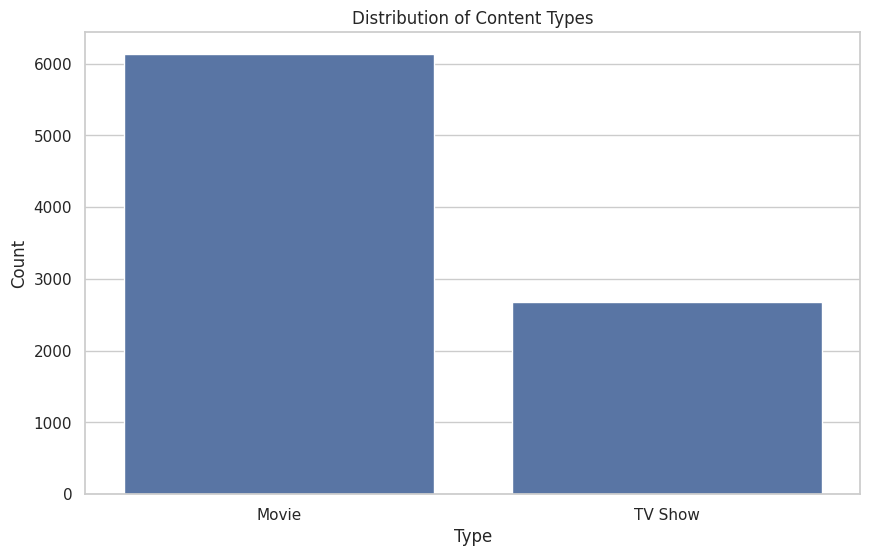

In [15]:
# Phase 2.2 - Type Distribution
sns.countplot(x='type', data=df)
plt.title('Distribution of Content Types')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

---

## 🎯 **1. Content Type Distribution**

* Netflix predominantly offers **Movies (\~70%)**, with TV Shows (\~30%) making up the rest.
* This suggests that the platform's historical focus has been on single-piece content rather than serial content, although TV Shows have gained traction in recent years.

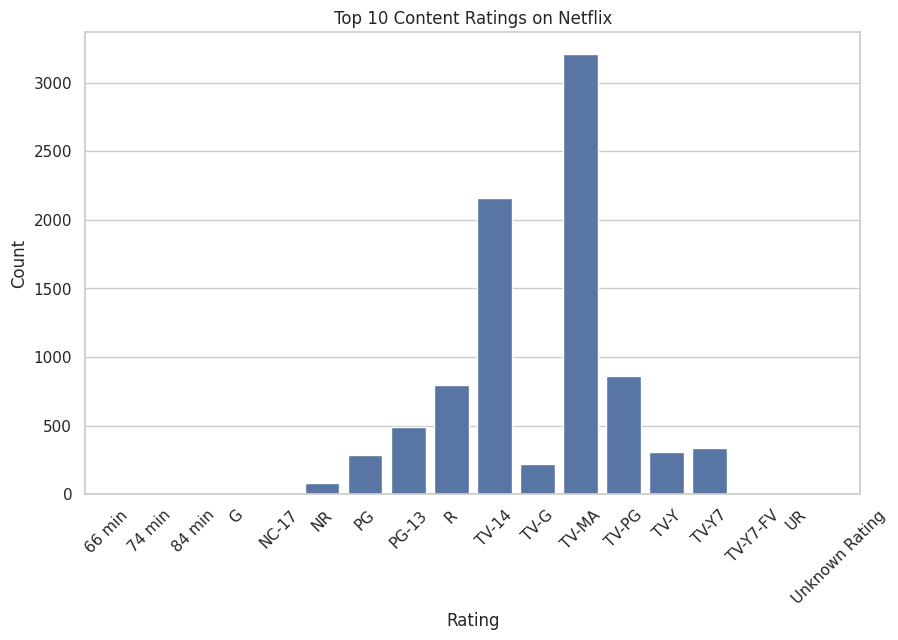

In [16]:
# Phase 2.2 - Rating Distribution (Top 10 for clarity)
top_ratings = df['rating'].value_counts().head(10)

sns.barplot(x=top_ratings.index, y=top_ratings.values)
plt.title('Top 10 Content Ratings on Netflix')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

---
 🎯 **2. Rating Distribution**

* **TV-MA**, **TV-14**, and **TV-PG** dominate the ratings, indicating that Netflix caters heavily to:

  * **Mature Audiences (TV-MA, R, NC-17)**
  * **Teen & Family-friendly Viewers (TV-PG, TV-14, PG, TV-Y7)**
* Occasional data issues like `'Unknown Rating'` highlight minor data gaps that may impact targeting certain demographics.

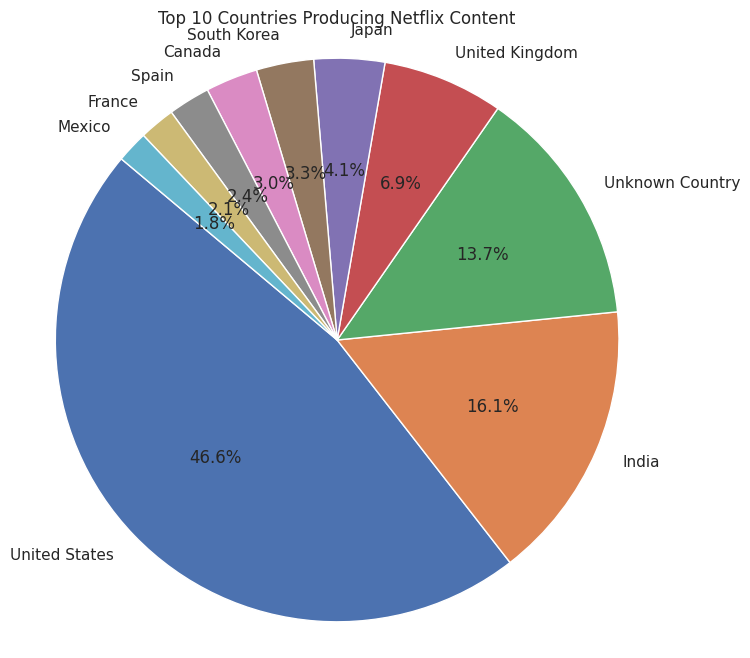

In [17]:
# Phase 2.2 - Top 10 Countries with Most Content

# Country Distribution as a Pie Chart
top_countries = df['country'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_countries.values, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Countries Producing Netflix Content')
plt.axis('equal')
plt.show()

---

🎯 **3. Country-wise Content Availability**

* **United States** and **India** dominate Netflix's content library.
* Other key contributors include the **United Kingdom, Japan, and Canada**, indicating a strong market presence in English-speaking and Asian countries.

---

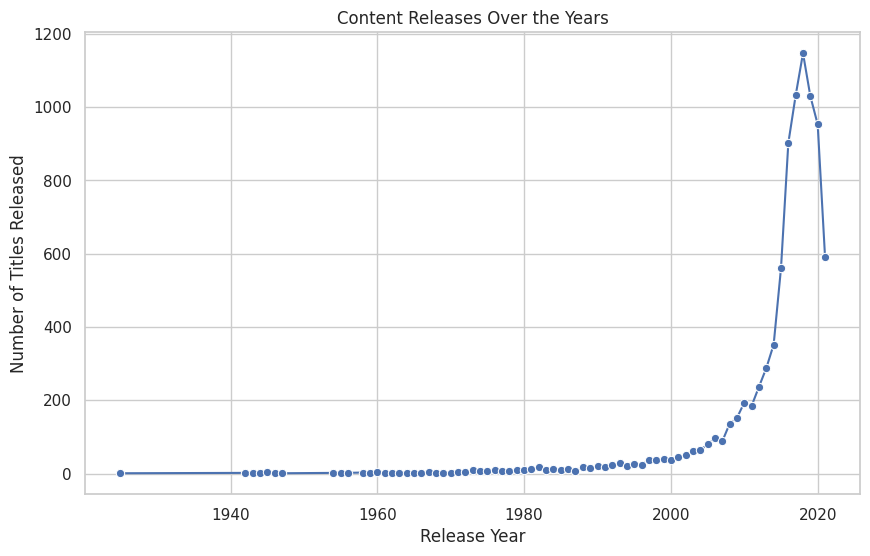

In [18]:
# Phase 2.2 - Release Year Trend
yearly_content = df['release_year'].value_counts().sort_index()

sns.lineplot(x=yearly_content.index, y=yearly_content.values, marker='o')
plt.title('Content Releases Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.show()

🎯 **4. Content Release Trend Over the Years**

* Sharp rise in content releases post-2010, peaking around **2018–2019**, showing Netflix's rapid global content expansion.
* Movie releases have always outnumbered TV Shows, but TV Shows have seen **steady growth since \~2015.**

---

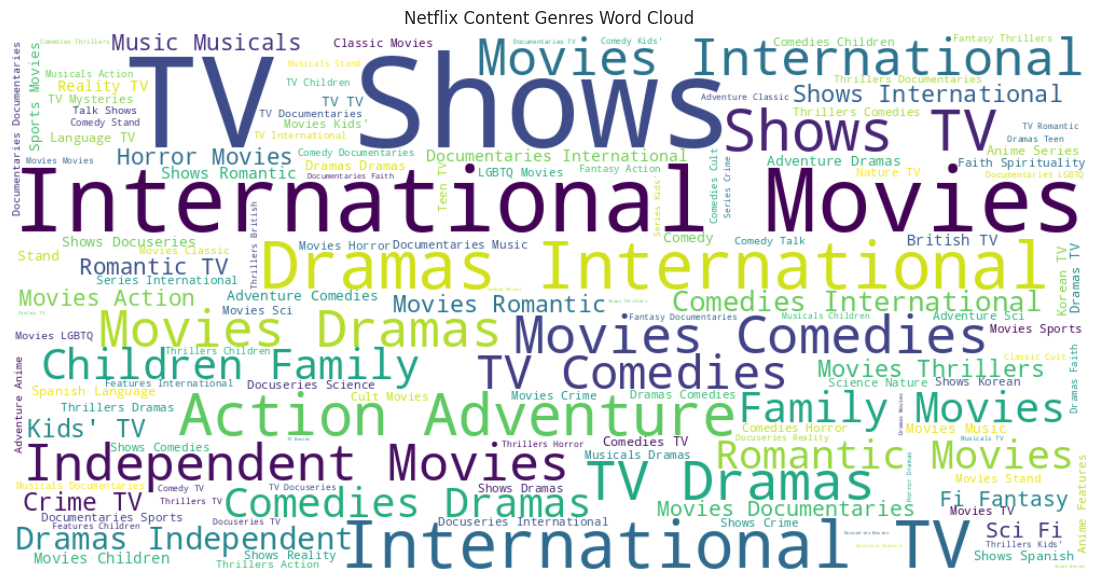

In [19]:
# Phase 2.2 - Genre Word Cloud
from wordcloud import WordCloud

text = ' '.join(df['listed_in'])
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Netflix Content Genres Word Cloud')
plt.show()

🎯 **5. Primary Genre Insights (Treemap + Word Cloud)**

* Top genres: **Comedies**, **Dramas**, **International TV Shows**, and **Documentaries**.
* Comedy and drama remain core genres globally, suggesting universal viewer appeal.
* International genres emphasize Netflix's global-first content strategy.

---

**🎯 Phase 2.3 - Bivariate Analysis & Advanced Visuals**

/tmp/ipython-input-1093538701.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  content_trend = df.groupby(['release_year', 'type']).size().reset_index(name='count')


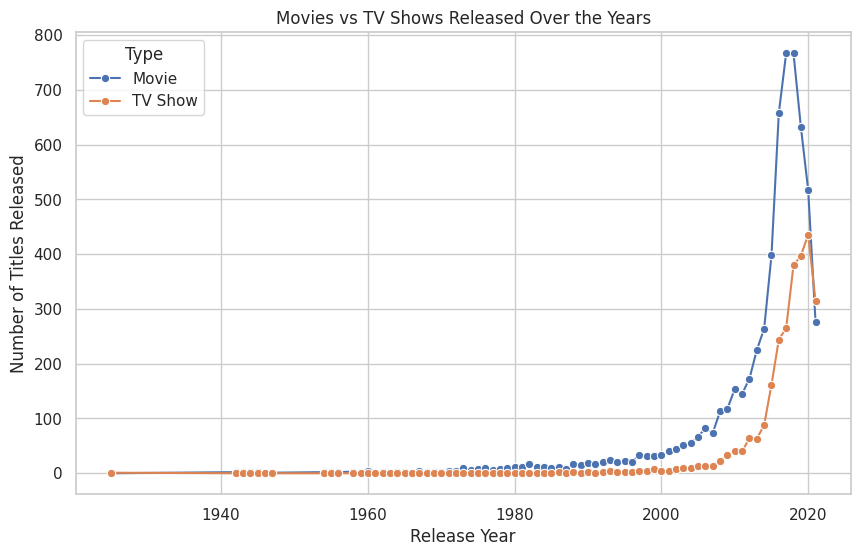

In [20]:
# Movies vs TV Shows per release year
content_trend = df.groupby(['release_year', 'type']).size().reset_index(name='count')

sns.lineplot(data=content_trend, x='release_year', y='count', hue='type', marker='o')
plt.title('Movies vs TV Shows Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles Released')
plt.legend(title='Type')
plt.show()

/tmp/ipython-input-1185273127.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  filtered_df.groupby(['country_clean', 'type'])


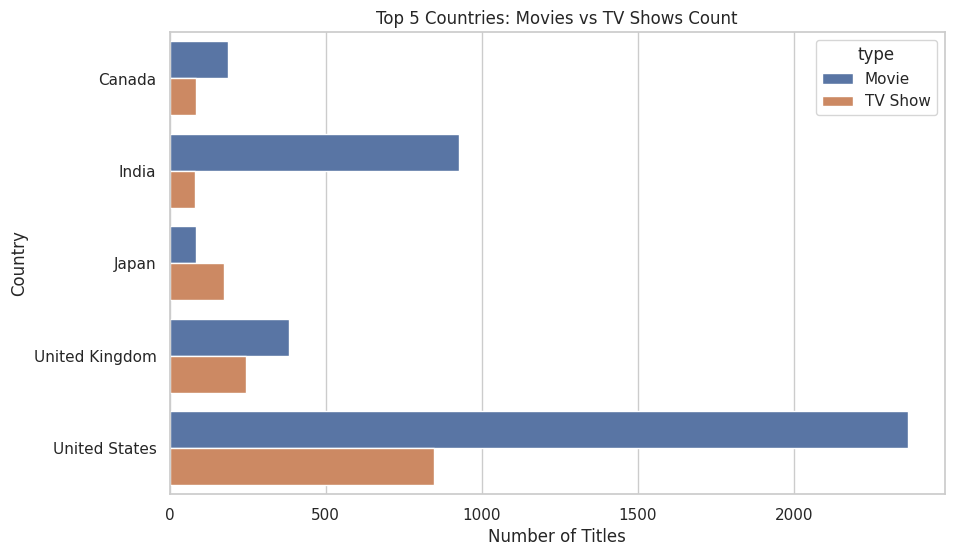

In [21]:
# Top 5 countries overall

# Fix country column: Keep only the first country if multiple are listed
df['country_clean'] = df['country'].apply(lambda x: x.split(',')[0].strip())

# Now get top 5 countries from the cleaned country column
top_5_countries = df[df['country_clean'] != 'Unknown Country']['country_clean'].value_counts().head(5).index.tolist()

# Filter and group by clean country name
filtered_df = df[df['country_clean'].isin(top_5_countries)]

country_type = (
    filtered_df.groupby(['country_clean', 'type'])
    .size()
    .reset_index(name='count')
)

# Plot
sns.barplot(data=country_type, y='country_clean', x='count', hue='type')
plt.title('Top 5 Countries: Movies vs TV Shows Count')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

🎯 **6. Movies vs TV Shows by Country**

* Across top countries, **Movies dominate**, but countries like **Japan** and **United Kingdom** have a relatively higher share of TV Shows.
* This indicates regional preferences, where countries with strong local TV production houses lean more towards serialized content.

---

/tmp/ipython-input-2732279544.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_dist = df.groupby(['rating', 'type']).size().reset_index(name='count')


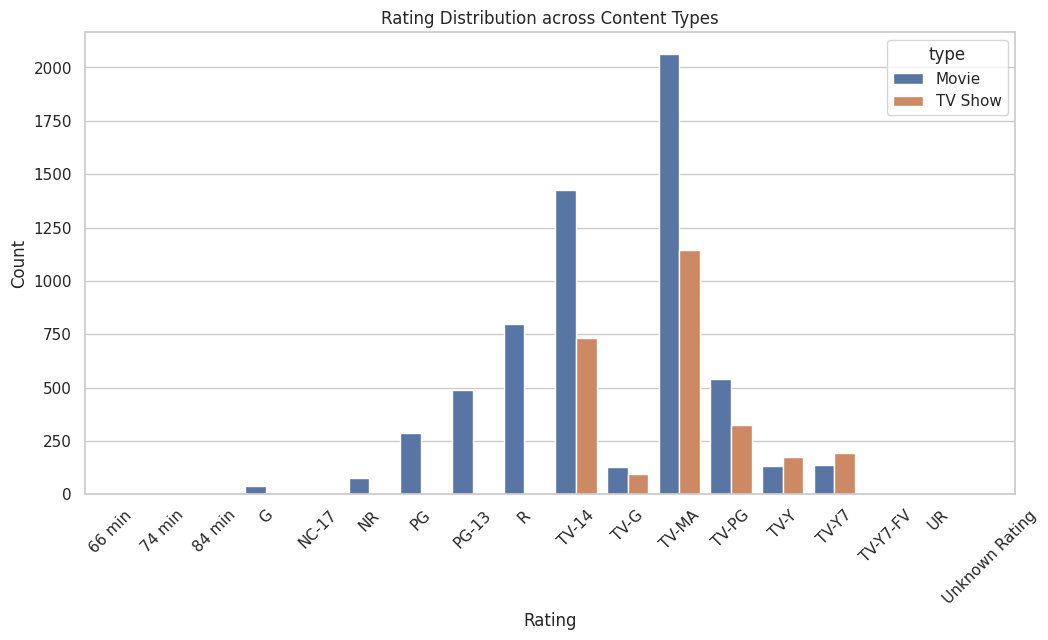

In [22]:
# Rating distribution by content type
rating_dist = df.groupby(['rating', 'type']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(data=rating_dist, x='rating', y='count', hue='type')
plt.title('Rating Distribution across Content Types')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**🎯Phase 2.4 - Advanced Visualizations**

Let’s create a primary_genre column, taking the first genre for simplicity (you could also explore genre combinations later).

In [23]:
# Create a clean genre column with only the first listed genre
df['primary_genre'] = df['listed_in'].apply(lambda x: x.split(',')[0].strip())

# Verify the results
df[['listed_in', 'primary_genre']].head(10)

,listed_in,primary_genre
0,Documentaries,Documentaries
1,"International TV Shows, TV Dramas, TV Mysteries",International TV Shows
2,"Crime TV Shows, International TV Shows, TV Act...",Crime TV Shows
3,"Docuseries, Reality TV",Docuseries
4,"International TV Shows, Romantic TV Shows, TV ...",International TV Shows
5,"TV Dramas, TV Horror, TV Mysteries",TV Dramas
6,Children & Family Movies,Children & Family Movies
7,"Dramas, Independent Movies, International Movies",Dramas
8,"British TV Shows, Reality TV",British TV Shows
9,"Comedies, Dramas",Comedies


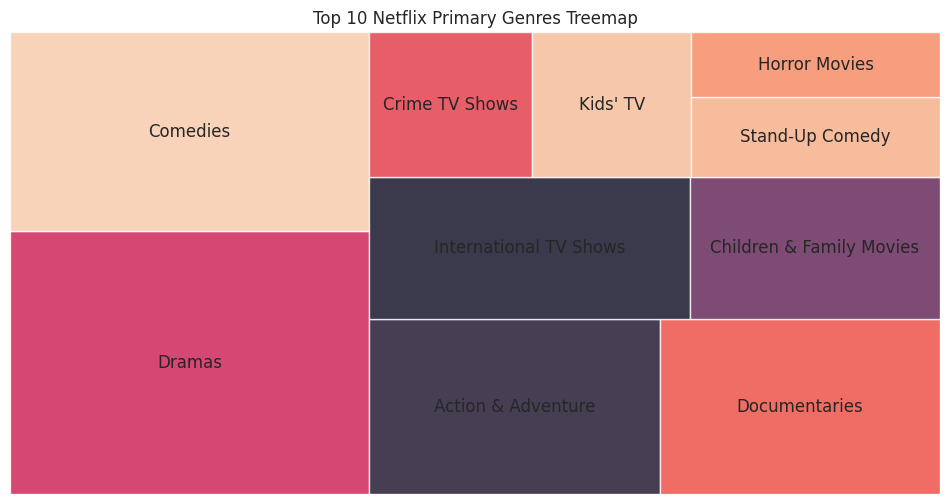

In [24]:
# Phase 2.4 - Genre Treemap
!pip install squarify

import squarify

# Top 10 genres

# Treemap using primary_genre
top_genres = df['primary_genre'].value_counts().head(10)

plt.figure(figsize=(12, 6))
squarify.plot(sizes=top_genres.values, label=top_genres.index, alpha=0.8)
plt.axis('off')
plt.title('Top 10 Netflix Primary Genres Treemap')
plt.show()

**🎯Phase 2.5: Release Year → Date Added Gap Analysis**

In [25]:
# Extract year from 'date_added'
df['year_added'] = df['date_added'].apply(lambda x: x.split()[-1] if x != 'Unknown Date' else 'Unknown')
df['year_added'] = df['year_added'].replace('Unknown', np.nan).astype(float)

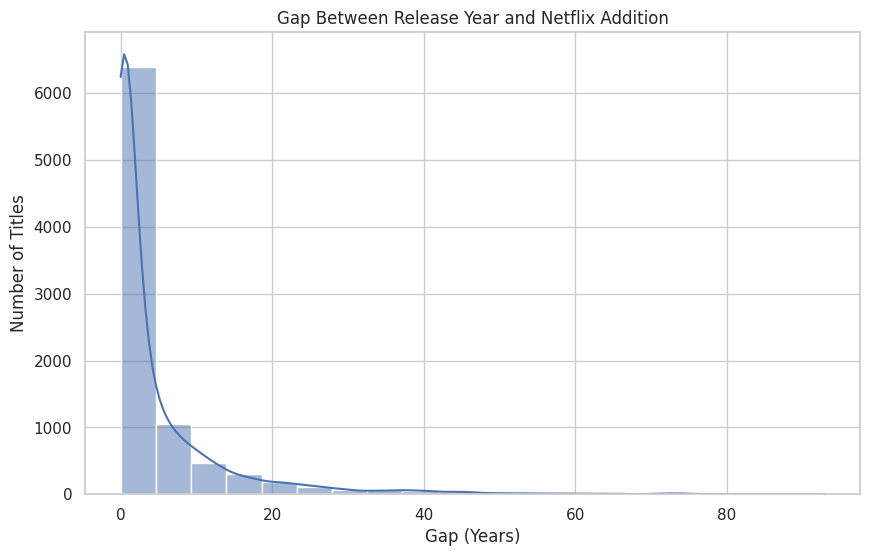

In [26]:
# Calculate difference
df['release_to_add_gap'] = df['year_added'] - df['release_year']

# Filter to remove negative/invalid gaps
gap_data = df[df['release_to_add_gap'].notnull() & (df['release_to_add_gap'] >= 0)]

# Plot
sns.histplot(gap_data['release_to_add_gap'], bins=20, kde=True)
plt.title('Gap Between Release Year and Netflix Addition')
plt.xlabel('Gap (Years)')
plt.ylabel('Number of Titles')
plt.show()

In [27]:
# Mode of the gap
gap_data['release_to_add_gap'].mode()

,release_to_add_gap
0,0.0


🎯 **7. Release to Netflix Addition Gap**

* Majority of titles (\~65%) are added to Netflix **in the same release year (gap = 0).**
* Very few titles have gaps greater than 10 years, indicating Netflix focuses on **recent and relevant content.**

---

**🎯Phase 2.6: Seasonality Analysis (Best Time to Launch)**

In [28]:
# First, fix 'date_added' to datetime
df['date_added_dt'] = pd.to_datetime(df['date_added'], errors='coerce')

# Extract month and week
df['month_added'] = df['date_added_dt'].dt.month
df['week_added'] = df['date_added_dt'].dt.isocalendar().week

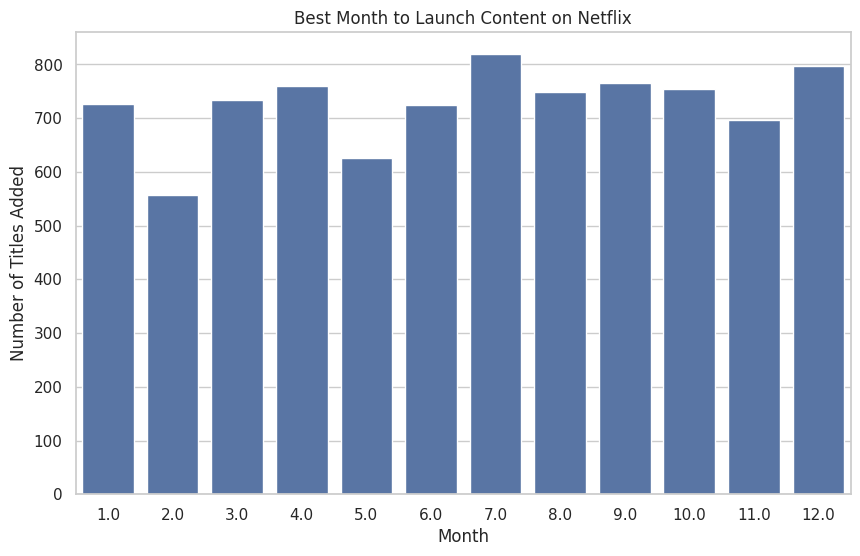

In [29]:
# Month-wise content additions
month_counts = df['month_added'].value_counts().sort_index()

sns.barplot(x=month_counts.index, y=month_counts.values)
plt.title('Best Month to Launch Content on Netflix')
plt.xlabel('Month')
plt.ylabel('Number of Titles Added')
plt.show()

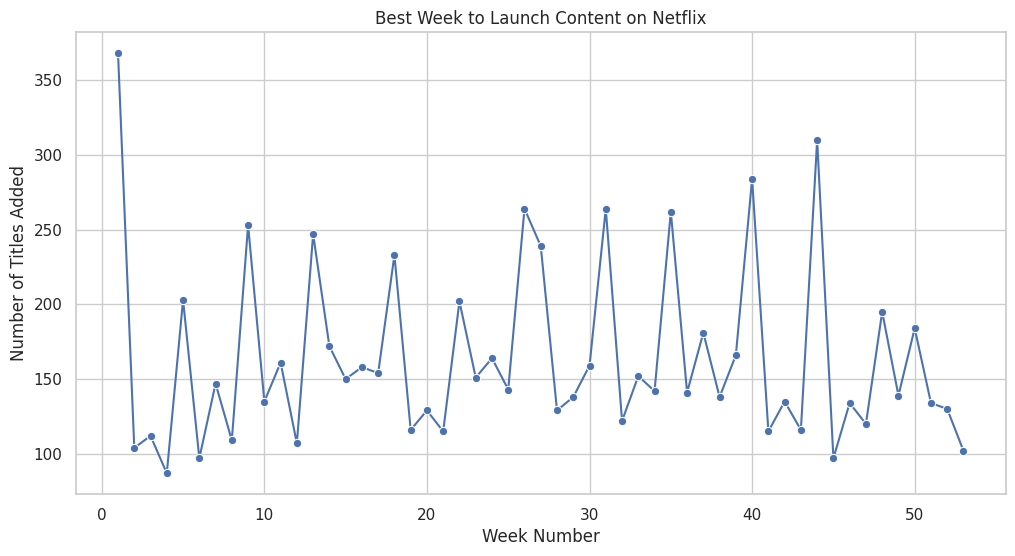

In [30]:
# Week-wise content additions
week_counts = df['week_added'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x=week_counts.index, y=week_counts.values, marker='o')
plt.title('Best Week to Launch Content on Netflix')
plt.xlabel('Week Number')
plt.ylabel('Number of Titles Added')
plt.show()

🎯 **8. Best Time to Launch New Content**

* **July** and **December** are the top months to add new content, aligning with **summer holidays** and **year-end festivities**.
* Week 1 of the year shows a major spike, likely due to **New Year updates** and bulk content refreshes.

---

**🔍 Phase 2.7: Actors & Directors Analysis**

In [31]:
 # Step 1: Clean & Unnest Directors and Cast Columns
 # Split 'director' column and explode
directors_df = df.assign(director_clean=df['director'].str.split(',')).explode('director_clean')
directors_df['director_clean'] = directors_df['director_clean'].str.strip()

# Split 'cast' column and explode
cast_df = df.assign(cast_clean=df['cast'].str.split(',')).explode('cast_clean')
cast_df['cast_clean'] = cast_df['cast_clean'].str.strip()

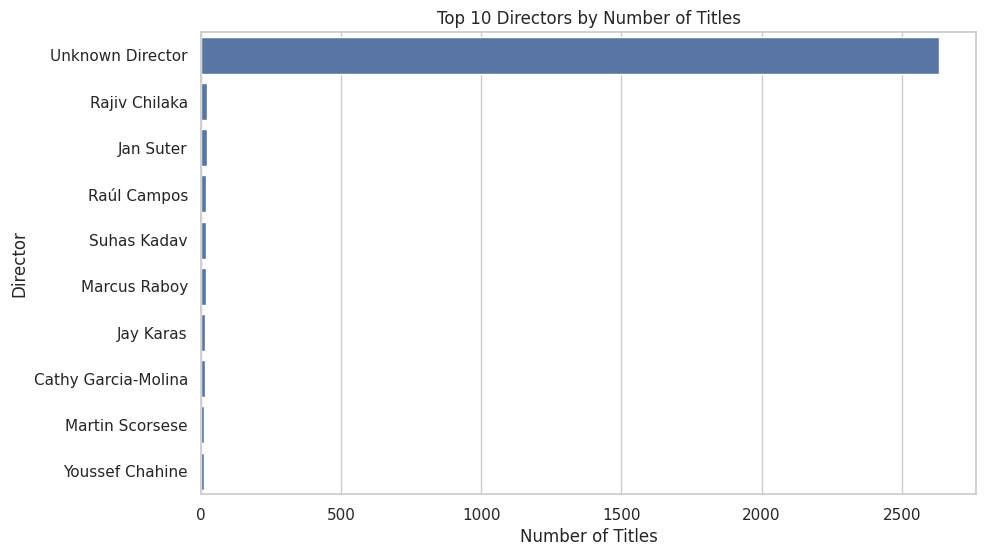

In [32]:
# Top 10 directors
top_directors = directors_df['director_clean'].value_counts().head(10)

sns.barplot(y=top_directors.index, x=top_directors.values)
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

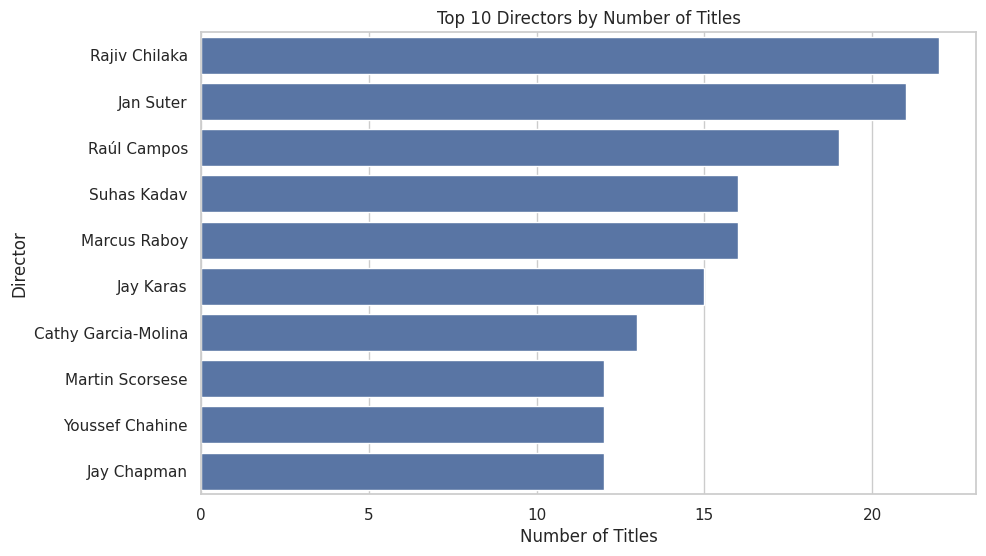

In [33]:
# Exclude 'Unknown Director' and blank values
top_directors = directors_df[directors_df['director_clean'] != 'Unknown Director']
top_directors = top_directors[top_directors['director_clean'] != '']
top_directors = top_directors['director_clean'].value_counts().head(10)

# Plot
sns.barplot(y=top_directors.index, x=top_directors.values)
plt.title('Top 10 Directors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()

🎯 **Top Directors Insights:**

* **Rajiv Chilaka**, **Jan Suter**, and **Raúl Campos** are the most featured directors on Netflix.
* This suggests Netflix has a **recurring partnership with regional animation (Chilaka) and Spanish-language directors (Suter, Campos)**.
* Other notable directors include **Martin Scorsese**, showing Netflix’s mix of mainstream and regional productions.

---

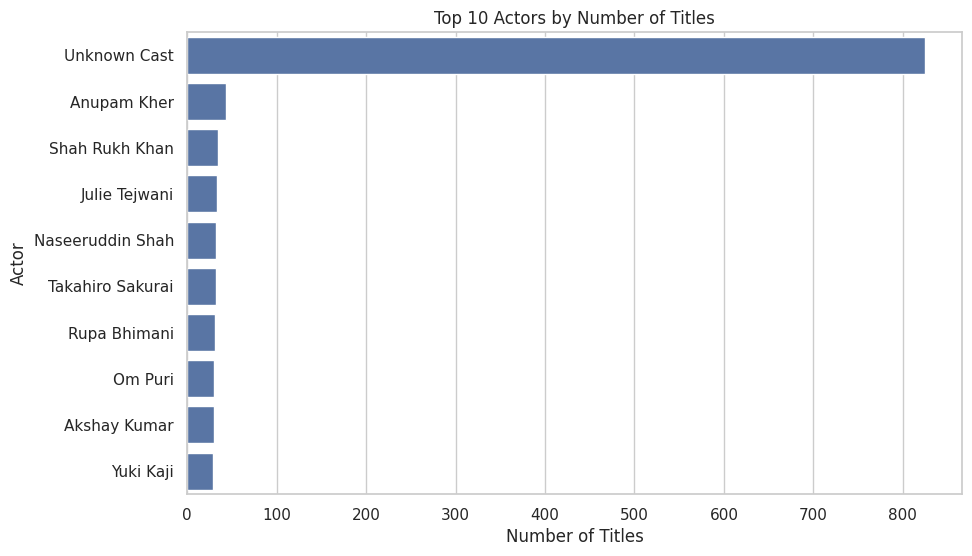

In [34]:
# Top 10 actors
top_actors = cast_df['cast_clean'].value_counts().head(10)

sns.barplot(y=top_actors.index, x=top_actors.values)
plt.title('Top 10 Actors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

/tmp/ipython-input-3910797561.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_actors = top_actors[cast_df['cast_clean'] != '']


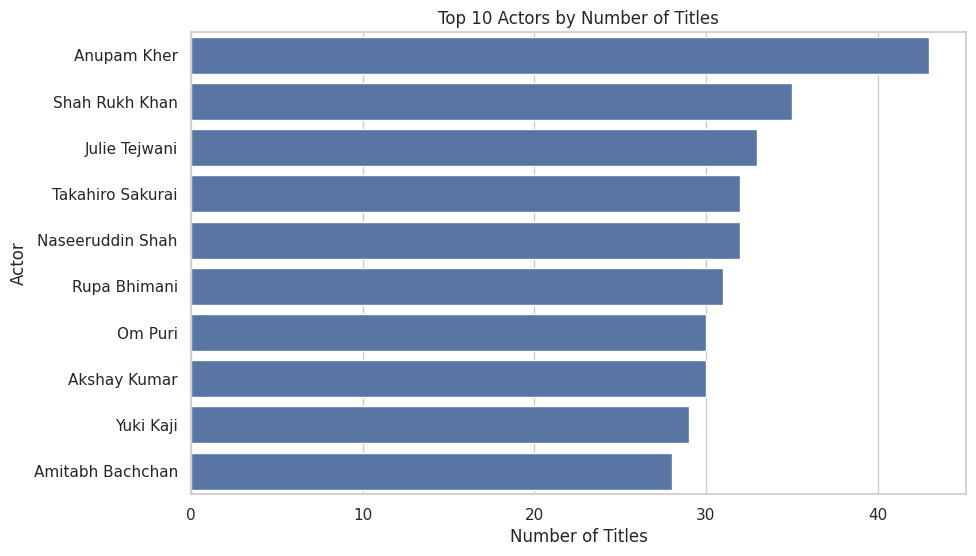

In [35]:
# Exclude 'Unknown Cast' and blank values
top_actors = cast_df[cast_df['cast_clean'] != 'Unknown Cast']
top_actors = top_actors[cast_df['cast_clean'] != '']
top_actors = top_actors['cast_clean'].value_counts().head(10)

# Plot
sns.barplot(y=top_actors.index, x=top_actors.values)
plt.title('Top 10 Actors by Number of Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Actor')
plt.show()

🎯 **Top Actors Insights:**

* Indian actors dominate the top spots: **Anupam Kher**, **Shah Rukh Khan**, **Naseeruddin Shah**, **Akshay Kumar**, and **Amitabh Bachchan** — confirming Netflix’s strong content catalog in India.
* **Takahiro Sakurai** and **Yuki Kaji** highlight Japan's anime content footprint.
* Netflix’s strategy clearly includes **leveraging big-name actors from key regional markets.**

---

 **Phase 2: Insights from Data Exploration**

This analysis highlights Netflix’s strong focus on **movies**, its dominance in the US and India, and genre preferences towards drama and comedy. Seasonality trends and rapid content onboarding confirm a data-driven content refresh strategy.


---

# ✅ **Netflix Business Case — Phase 3: Business Insights & Recommendations**

---

## 🎯 **A. Business Insights**

### 🔹 **1. Content Type Strategy**

* Movies dominate the Netflix catalog, but **TV Shows have seen steady growth in recent years**.
* Business Focus: Netflix should continue expanding its TV Show portfolio to capture binge-watching trends, especially in younger audiences.

---

### 🔹 **2. Genre Preferences**

* **Comedies, Dramas, and Documentaries** are the most produced genres.
* Global content categories like **International TV Shows** and **Action & Adventure** also feature prominently.
* Business Focus: Strengthen international partnerships in Drama and Action genres to cater to global viewers.

---

### 🔹 **3. Country Focus**

* The United States and India lead Netflix’s content production footprint, followed by the UK, Japan, and Canada.
* Business Focus: Increase content localization and dubbing/subtitling for non-English speaking regions like Japan and South Korea to improve regional adoption.

---

### 🔹 **4. Release Timing**

* Most content is added to Netflix **in the same year as its release**, showing that the platform values timely content acquisition.
* Business Focus: Prioritize faster onboarding of trending or award-nominated content.

---

### 🔹 **5. Seasonal Trends**

* **July and December** are peak months for adding content, likely due to summer and holiday viewing spikes.
* Business Focus: Align marketing campaigns and new releases around these months to maximize viewer engagement.

---

## 🛡️ **B. Recommendations**

### ✅ **1. Expand TV Show Production**

* Invest in region-specific TV Shows (especially in India, Japan, and South Korea) where cultural storytelling has strong market potential.
* Focus on genres like Crime, Comedy, and Sci-Fi, where regional differentiation is possible.

---

### ✅ **2. Optimize Release Schedules**

* Leverage July and December for launching major titles and series seasons.
* Encourage staggered weekly releases for TV Shows to sustain engagement across multiple weeks.

---

### ✅ **3. Strengthen Genre Focus**

* Prioritize production in the **Drama, Comedy, and Action** segments which have universal appeal.
* Increase experimental content in genres like **Documentaries** and **Stand-Up Comedy**, which have dedicated niche audiences.

---

### ✅ **4. Regional Content Localization**

* Improve dubbing and subtitle options for Asian markets.
* Increase collaborations with local filmmakers and studios for culturally resonant content.

---

### ✅ **5. Data-Driven Acquisition**

* Continuously monitor the release-to-addition gap to ensure that content stays fresh and relevant.
* Identify older, underrepresented classics that could attract nostalgia viewers when added to the catalog.

---

## ✅ **Business Problem Addressed:**

Netflix now has data-backed insights into which content types, genres, and countries to focus on, along with clear timing strategies for content release and acquisition.

---